# 14章 時系列の手法を学ぼう 1

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
display(df)
display(df.info())

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None

<Axes: xlabel='ds', ylabel='y'>

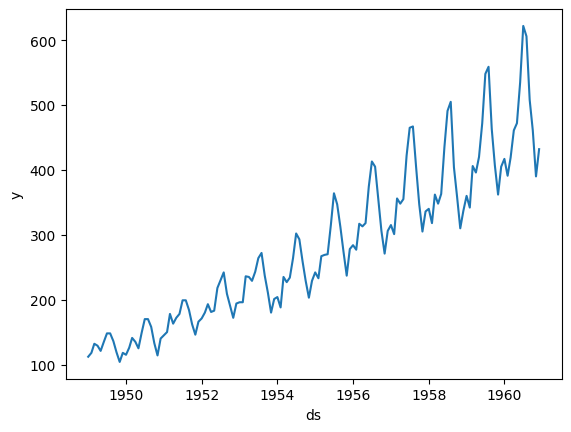

In [3]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])

In [4]:
from prophet import Prophet
model = Prophet()

In [5]:
# 本来はtrain, valid(test) に分割し、trainで学習させる必要がある。trainで学習させた範囲のモデルを後続のcross_validationで活用する
# https://zenn.dev/aidemy/articles/3587a5c0d4c210
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/r9gg7m7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/6var66ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84733', 'data', 'file=/tmp/tmp9zed7ltw/r9gg7m7_.json', 'init=/tmp/tmp9zed7ltw/6var66ev.json', 'output', 'file=/tmp/tmp9zed7ltw/prophet_model4u7qy3b0/prophet_model-20240708111321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# 予測
## 元のdfでは1960/12/1までだったが、予測対象は未知データである必要がある
## MS	1か月（追加される日時データは、月の初日となる）
future = model.make_future_dataframe(periods=36, freq='MS')
display(future)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [7]:
forecast = model.predict(future)
display(forecast)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,58.395366,115.480600,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,49.411470,108.334629,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,84.325094,140.311367,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,77.886530,138.530498,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,84.139128,140.759381,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,624.280127,681.360485,580.267314,586.123526,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,575.479710,633.604361,583.297123,589.392669,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,538.259888,597.583638,586.205829,592.633396,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,507.639735,562.315613,589.173789,595.920164,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [8]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,58.395366,115.480600
1,1949-02-01,79.495226,49.411470,108.334629
2,1949-03-01,111.025581,84.325094,140.311367
3,1949-04-01,108.719017,77.886530,138.530498
4,1949-05-01,112.095281,84.139128,140.759381
...,...,...,...,...
175,1963-08-01,650.733803,624.280127,681.360485
176,1963-09-01,603.483588,575.479710,633.604361
177,1963-10-01,567.259613,538.259888,597.583638
178,1963-11-01,535.439784,507.639735,562.315613


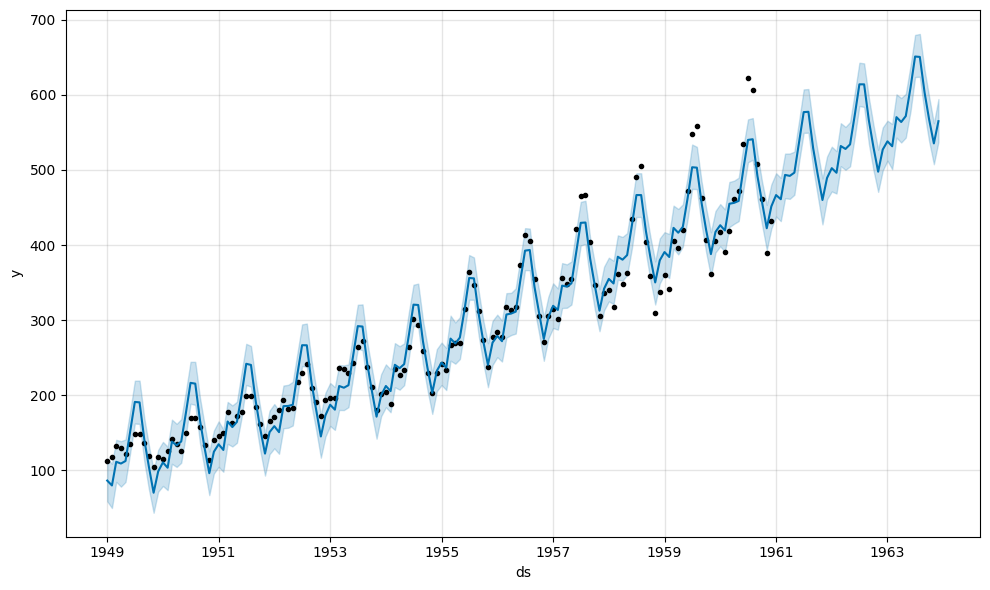

In [9]:
fig_forecast = model.plot(forecast)

## 6. 予測の評価

In [10]:
# cutoffs	いつまでのデータを学習データとするかという期限の日付
cutoffs = pd.to_datetime(["1954-12-01", "1955-12-01", "1956-12-01", "1957-12-01"])
display(cutoffs)

DatetimeIndex(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'], dtype='datetime64[ns]', freq=None)

In [11]:
from prophet.diagnostics import cross_validation

In [12]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/4q1lyxng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/z_lzqcot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72057', 'data', 'file=/tmp/tmp9zed7ltw/4q1lyxng.json', 'init=/tmp/tmp9zed7ltw/z_lzqcot.json', 'output', 'file=/tmp/tmp9zed7ltw/prophet_modelahboqhus/prophet_model-20240708112026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/vcpgv7a0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zed7ltw/0pp8yguy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [13]:
display(df_cv)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,226.955798,248.696382,242,1954-12-01
1,1955-02-01,241.792078,230.494626,253.292816,233,1954-12-01
2,1955-03-01,267.141230,255.553371,279.419410,267,1954-12-01
3,1955-04-01,257.744480,246.036869,268.693160,269,1954-12-01
4,1955-05-01,261.961916,250.990987,273.569460,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,528.534786,569.907534,606,1957-12-01
140,1960-09-01,511.578231,490.951664,532.506142,508,1957-12-01
141,1960-10-01,480.747994,461.815115,501.288187,461,1957-12-01
142,1960-11-01,455.417988,436.156673,476.122655,390,1957-12-01


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
# performance_metricsでのhorizonは、各予測ポイントからの経過日数
## 例えば、'121 days 00:00:00'は、予測開始点から121日後のポイントでの性能を示す
# mse: rolling_windowが10%なのでhorizonが121日目の指標は、121日のうちその時点から直近の約109日分(1096*0.1)のデータを使用
## rolling_windowはhorizon=1096 daysにかかっている
# 121 days(４か月)はprophetの自動調整結果
df_p = performance_metrics(df_cv)
display(len(df_p))
display(df_p)

In [ ]:
df_p = performance_metrics(df_cv, monthly=True)
display(len(df_p))
display(df_p)

In [ ]:
sns.lineplot(x="horizon", y="mse", data=df_p)

In [ ]:
sns.lineplot(x='horizon', y='coverage', data=df_p)


# 15章: 前章の続き

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
display(df)

In [ ]:
from prophet import Prophet
# 周期性変動が徐々に拡大するモデル
# "multiplicative" (乗法的):
# 季節性の効果がトレンドに比例して変化する
# "additive" (加法的):
# 季節性の効果が時間とともに一定であると仮定
model = Prophet(seasonality_mode="multiplicative")

In [ ]:
model.fit(df)

In [ ]:
future: pd.DataFrame = model.make_future_dataframe(periods=36, freq="MS")
display(future)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

In [ ]:
fig_forecast = model.plot(forecast)

In [ ]:
cutoffs = pd.to_datetime(["1954-12-01", "1955-12-01", "1956-12-01", "1957-12-01"])

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

In [ ]:
sns.lineplot(x='horizon', y='mse', data=df_p).set(ylim=(0, 5000))

In [ ]:
sns.lineplot(x='horizon', y='coverage', data=df_p)

## 補足1: 不確実性区間の幅の調整

In [ ]:
# coverage: 不確実性区間(lower, upper)に予測値が含まれている割合
# interval_widthを広げることで予測幅を広げる
model = Prophet(seasonality_mode="multiplicative", interval_width=0.95)
model.fit(df)
future = model.make_future_dataframe(periods=36, freq="MS")
forecast = model.predict(future)
fig_forecast = model.plot(forecast)

In [ ]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

In [ ]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv, monthly=True)
sns.lineplot(x='horizon', y="coverage", data=df_p)

# 補足2: 予測モデルの構成要素の確認

In [ ]:
fig_components = model.plot_components(forecast)

# 演習1
以下のデータはWikipediaページビューデータです。１年先までの時系列予測と評価をおこなってください。


```
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
```



In [ ]:
# 演習1
from prophet import Prophet
import prophet.plot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
display(data.head())
display(data.info())
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [ ]:

df = data[['ds','y']]
m = Prophet()
m.fit(df)
# freq=Dが規定なので365日分の予測対象を追加している
future = m.make_future_dataframe(periods=365)
display(future)
forecast = m.predict(future)
display(type(forecast))
display(forecast.head())

fig = m.plot(forecast)

In [ ]:
from prophet.diagnostics import cross_validation

cutoffs = pd.to_datetime(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31'])
df_cv = cross_validation(m, horizon="365 days", cutoffs=cutoffs, period="180 days")
df_cv


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [ ]:
sns.lineplot(x='horizon', y='mse', data=df_p)

In [ ]:
sns.lineplot(x='horizon', y='coverage', data=df_p)